# Zindi Covid-19 Contest - Data Prep

This notebook shows how the data for the Zindi contest - Predicting the Global Spread of COVID-19 is derived. As this is an evolving situation, the dataset is not fixed at the start of the contest. Instead, you may use all available data at a given time, and are encouraged to keep incorporating new data as it becomes available. Each week, the leaderboard wil reset and a new submission file will be shared covering the most recent test period. The ultimate goal is to make predictions fo the time following the CLOSE of the competition - more info on the competition page.

In [1]:
# imports
import pandas as pd
import numpy as np
import os


#Download DATA
The data has been curated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE), and is pubically available on their GitHub repository. We clone the repository to get the data.

In [2]:
# Get the latest data
!git clone https://github.com/ulklc/covid19-timeseries

fatal: le chemin de destination 'covid19-timeseries' existe déjà et n'est pas un répertoire vide.


In [3]:
cases = pd.read_csv('covid19-timeseries/countryReport/raw/rawReport.csv',  parse_dates=['day'])
cases.tail()

,day,countryCode,countryName,region,lat,lon,confirmed,recovered,death
25580,2020-05-15,ZW,Zimbabwe,Africa,-20.0,30.0,42,13,4
25581,2020-05-16,ZW,Zimbabwe,Africa,-20.0,30.0,42,13,4
25582,2020-05-17,ZW,Zimbabwe,Africa,-20.0,30.0,44,17,4
25583,2020-05-18,ZW,Zimbabwe,Africa,-20.0,30.0,46,18,4
25584,2020-05-19,ZW,Zimbabwe,Africa,-20.0,30.0,46,18,4


In [4]:
deaths = pd.read_csv('covid19-timeseries/countryReport/raw/rawReport.csv', parse_dates=['day'])

In [5]:
dates = cases['day'] 
ids = []
for d in dates:
    ids.append(d.strftime('%m/%d/%y'))
    
#ids
cases['day'] = ids 
deaths['day'] = ids 


In [6]:
cases.head()

,day,countryCode,countryName,region,lat,lon,confirmed,recovered,death
0,01/22/20,AD,Andorra,Europe,42.5,1.5,0,0,0
1,01/23/20,AD,Andorra,Europe,42.5,1.5,0,0,0
2,01/24/20,AD,Andorra,Europe,42.5,1.5,0,0,0
3,01/25/20,AD,Andorra,Europe,42.5,1.5,0,0,0
4,01/26/20,AD,Andorra,Europe,42.5,1.5,0,0,0


In [7]:
countries = pd.read_excel('EF.xlsx')[:193]
countries.tail(2)

,English short,French short,English formal,French formal
191,Zambia,Zambie (la),the Republic of Zambia,la République de Zambie
192,Zimbabwe,Zimbabwe (le),the Republic of Zimbabwe,la République du Zimbabwe


In [8]:
# Which regions in the JHU data have direct matches in countries?
print(deaths.shape, deaths['countryName'].unique().shape)
print(deaths.loc[deaths['countryName'].isin(countries['English short'].values)]['countryName'].unique().shape)

(25585, 9) (215,)
(153,)


In [9]:
# For those with direct matches, add a new column ['Territory']
deaths['Territory'] = ''
for c in deaths.loc[deaths['countryName'].isin(countries['English short'].values)]['countryName'].unique():
  deaths.loc[deaths['countryName'] == c, 'Territory'] = c

# Same for cases
cases['Territory'] = ''
for c in cases.loc[cases['countryName'].isin(countries['English short'].values)]['countryName'].unique():
  cases.loc[cases['countryName'] == c, 'Territory'] = c

deaths.loc[deaths['countryName']=='Taiwan*', 'Territory'] = 'Taiwan'
cases.loc[cases['countryName']=='Taiwan*', 'Territory'] = 'Taiwan'

In [10]:
# The problem ones we need to reconcile manually:
print(deaths.loc[~deaths['countryName'].isin(countries['English short'].values)]['countryName'].unique())

['United Arab Emirates' 'Anguilla' 'Aruba' 'Saint Barthélemy' 'Bermuda'
 'Brunei' 'Bolivia' 'Caribbean Netherlands' 'Bahamas' 'DR Congo'
 'Central African Republic' 'Republic of the Congo' 'Ivory Coast'
 'Cape Verde' 'Curaçao' 'Dominican Republic' 'Western Sahara'
 'Falkland Islands' 'Faroe Islands' 'United Kingdom' 'French Guiana'
 'Gibraltar' 'Greenland' 'Gambia' 'Guadeloupe' 'Hong Kong' 'Isle of Man'
 'Iran' 'Comoros' 'South Korea' 'Cayman Islands' 'Laos' 'Moldova'
 'Saint Martin' 'Macau' 'Martinique' 'Montserrat' 'New Caledonia' 'Niger'
 'Netherlands' 'French Polynesia' 'Philippines'
 'Saint Pierre and Miquelon' 'Palestine' 'Réunion' 'Russia' 'Sudan'
 'São Tomé and Príncipe' 'Sint Maarten' 'Syria' 'Turks and Caicos Islands'
 'Taiwan' 'Tanzania' 'United States' 'Vatican City' 'Venezuela'
 'British Virgin Islands' 'Vietnam' 'Diamond Princess' 'Channel Islands'
 'MS Zaandam' 'Mayotte']


In [11]:
# Add them manually:
deaths.loc[deaths['countryName'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
deaths.loc[deaths['countryName'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
deaths.loc[deaths['countryName'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
deaths.loc[deaths['countryName'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
deaths.loc[deaths['countryName'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
deaths.loc[deaths['countryName'] == 'Bahamas', 'Territory'] = 'Bahamas (the)' 
deaths.loc[deaths['countryName'] == 'DR Congo', 'Territory'] = 'Democratic Republic of the Congo (the)'
deaths.loc[deaths['countryName'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
deaths.loc[deaths['countryName'] == 'Republic of the Congo', 'Territory'] = 'Congo (the)'
deaths.loc[deaths['countryName'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
deaths.loc[deaths['countryName'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
deaths.loc[deaths['countryName'] == 'Gambia', 'Territory'] = 'Gambia (the)'
deaths.loc[deaths['countryName'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
deaths.loc[deaths['countryName'] == 'Comoros', 'Territory'] = 'Comoros (the)'
deaths.loc[deaths['countryName'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"
deaths.loc[deaths['countryName'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
deaths.loc[deaths['countryName'] == 'Niger', 'Territory'] = 'Niger (the)'
deaths.loc[deaths['countryName'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
deaths.loc[deaths['countryName'] == 'Philippines', 'Territory'] = 'Philippines (the)'
deaths.loc[deaths['countryName'] == 'Palestine', 'Territory'] = 'State of Palestine (the))'
deaths.loc[deaths['countryName'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
deaths.loc[deaths['countryName'] == 'Sudan', 'Territory'] = "South Sudan"
deaths.loc[deaths['countryName'] == 'São Tomé and Príncipe', 'Territory'] = "Sao Tome and Principe"
deaths.loc[deaths['countryName'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
deaths.loc[deaths['countryName'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
deaths.loc[deaths['countryName'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"


# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', deaths.loc[deaths['Territory'] == '']['countryName'].unique())
print(deaths.shape)
deaths=deaths.loc[deaths['Territory']!= '']
print(deaths.shape)

# And for cases
# Add them manually:
cases.loc[cases['countryName'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
cases.loc[cases['countryName'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
cases.loc[cases['countryName'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
cases.loc[cases['countryName'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
cases.loc[cases['countryName'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
cases.loc[cases['countryName'] == 'Bahamas', 'Territory'] = 'Bahamas (the)' 
cases.loc[cases['countryName'] == 'DR Congo', 'Territory'] = 'Democratic Republic of the Congo (the)'
cases.loc[cases['countryName'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
cases.loc[cases['countryName'] == 'Republic of the Congo', 'Territory'] = 'Congo (the)'
cases.loc[cases['countryName'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
cases.loc[cases['countryName'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
cases.loc[cases['countryName'] == 'Gambia', 'Territory'] = 'Gambia (the)'
cases.loc[cases['countryName'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
cases.loc[cases['countryName'] == 'Comoros', 'Territory'] = 'Comoros (the)'
cases.loc[cases['countryName'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"
cases.loc[cases['countryName'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
cases.loc[cases['countryName'] == 'Niger', 'Territory'] = 'Niger (the)'
cases.loc[cases['countryName'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
cases.loc[cases['countryName'] == 'Philippines', 'Territory'] = 'Philippines (the)'
cases.loc[cases['countryName'] == 'Palestine', 'Territory'] = 'State of Palestine (the))'
cases.loc[cases['countryName'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
cases.loc[cases['countryName'] == 'Sudan', 'Territory'] = "South Sudan"
cases.loc[cases['countryName'] == 'São Tomé and Príncipe', 'Territory'] = "Sao Tome and Principe"
cases.loc[cases['countryName'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
cases.loc[cases['countryName'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
cases.loc[cases['countryName'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', cases.loc[cases['Territory'] == '']['countryName'].unique())
print(cases.shape)
cases=cases.loc[cases['Territory']!= '']
print(cases.shape)

Dropping ['Anguilla' 'Aruba' 'Saint Barthélemy' 'Bermuda' 'Caribbean Netherlands'
 'Ivory Coast' 'Cape Verde' 'Curaçao' 'Western Sahara' 'Falkland Islands'
 'Faroe Islands' 'French Guiana' 'Gibraltar' 'Greenland' 'Guadeloupe'
 'Hong Kong' 'Isle of Man' 'South Korea' 'Cayman Islands' 'Saint Martin'
 'Macau' 'Martinique' 'Montserrat' 'New Caledonia' 'French Polynesia'
 'Saint Pierre and Miquelon' 'Réunion' 'Sint Maarten'
 'Turks and Caicos Islands' 'Taiwan' 'United States' 'Vatican City'
 'British Virgin Islands' 'Vietnam' 'Diamond Princess' 'Channel Islands'
 'MS Zaandam' 'Mayotte']
(25585, 10)
(21063, 10)
Dropping ['Anguilla' 'Aruba' 'Saint Barthélemy' 'Bermuda' 'Caribbean Netherlands'
 'Ivory Coast' 'Cape Verde' 'Curaçao' 'Western Sahara' 'Falkland Islands'
 'Faroe Islands' 'French Guiana' 'Gibraltar' 'Greenland' 'Guadeloupe'
 'Hong Kong' 'Isle of Man' 'South Korea' 'Cayman Islands' 'Saint Martin'
 'Macau' 'Martinique' 'Montserrat' 'New Caledonia' 'French Polynesia'
 'Saint Pierre and

In [12]:
# Add the rest of the countries with cases set to 0 (!! Use with caution as data may be unreported)
import numpy as np

remainder = countries.loc[~countries['English short'].isin(deaths.Territory.unique())]
print('Adding:', remainder['English short'].unique())
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(deaths.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = deaths.columns
  row_df['countryName'] = c
  row_df['Territory'] = c
  deaths = pd.concat([deaths, row_df], ignore_index=True)
print(deaths.shape)

# And for cases
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(cases.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = cases.columns
  row_df['countryName'] = c
  row_df['Territory'] = c
  cases = pd.concat([cases, row_df], ignore_index=True)
print(cases.shape)

Adding: ['Cabo Verde' "Côte d'Ivoire"
 "Democratic People's Republic of Korea (the)" 'Kiribati'
 'Marshall Islands (the)' 'Micronesia (Federated States of)' 'Nauru'
 'Palau' 'Republic of Korea (the)' 'Samoa' 'Solomon Islands' 'Sudan (the)'
 'Tonga' 'Turkmenistan' 'Tuvalu' 'United States of America (the)'
 'Vanuatu' 'Viet Nam']
(21081, 10)
(21081, 10)


In [13]:
cases.head()

,day,countryCode,countryName,region,lat,lon,confirmed,recovered,death,Territory
0,01/22/20,AD,Andorra,Europe,42.5,1.5,0,0,0,Andorra
1,01/23/20,AD,Andorra,Europe,42.5,1.5,0,0,0,Andorra
2,01/24/20,AD,Andorra,Europe,42.5,1.5,0,0,0,Andorra
3,01/25/20,AD,Andorra,Europe,42.5,1.5,0,0,0,Andorra
4,01/26/20,AD,Andorra,Europe,42.5,1.5,0,0,0,Andorra


In [14]:
#!pip install countryinfo # Run if needed

## Adding Population info

This is optional, but this section adds population info. Use with caution, and feel free to make manual corrections. 

In [15]:
from countryinfo import CountryInfo

pops = {}
fails = []

regions = sorted(deaths['Territory'].unique())
for r in regions:
  try:
    country = CountryInfo(r)
    pops[r] = country.info()['population']
  except:
    fails.append(r)
    print('No pop data for', r)

No pop data for Andorra
No pop data for Bahamas (the)
No pop data for Bolivia (Plurinational State of)
No pop data for Brunei Darussalam
No pop data for Cabo Verde
No pop data for Central African Republic (the)
No pop data for Comoros (the)
No pop data for Congo (the)
No pop data for Czechia
No pop data for Côte d'Ivoire
No pop data for Democratic People's Republic of Korea (the)
No pop data for Democratic Republic of the Congo (the)
No pop data for Dominican Republic (the)
No pop data for Eswatini
No pop data for Gambia (the)
No pop data for Iran (Islamic Republic of)
No pop data for Lao People's Democratic Republic (the)
No pop data for Marshall Islands (the)
No pop data for Micronesia (Federated States of)
No pop data for Montenegro
No pop data for Myanmar
No pop data for Netherlands (the)
No pop data for Niger (the)
No pop data for North Macedonia
No pop data for Philippines (the)
No pop data for Republic of Korea (the)
No pop data for Republic of Moldova (the)
No pop data for Russ

In [16]:
# Adding in population as a column
cols = list(deaths.columns)
deaths['Population'] = deaths['countryName'].map(pops)
deaths = deaths[cols[:3]+['Population']+cols[3:]] # Better ordering
deaths.head()

,day,countryCode,countryName,Population,region,lat,lon,confirmed,recovered,death,Territory
0,01/22/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra
1,01/23/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra
2,01/24/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra
3,01/25/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra
4,01/26/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra


In [17]:
deaths.groupby(['Territory']).mean()['Population']

Territory
Afghanistan                           26023100.0
Albania                                2895947.0
Algeria                               38700000.0
Andorra                                      NaN
Angola                                24383301.0
                                         ...    
Venezuela (Bolivarian Republic of)           NaN
Viet Nam                                     NaN
Yemen                                 25956000.0
Zambia                                15023315.0
Zimbabwe                              13061239.0
Name: Population, Length: 194, dtype: float64

In [18]:
# Adding in population as a column
cols = list(cases.columns)
cases['Population'] = cases['countryName'].map(pops)
cases = cases[cols[:3]+['Population']+cols[3:]] # Better ordering
cases.head()

,day,countryCode,countryName,Population,region,lat,lon,confirmed,recovered,death,Territory
0,01/22/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra
1,01/23/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra
2,01/24/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra
3,01/25/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra
4,01/26/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra


In [19]:
cases['day'].head()

0    01/22/20
1    01/23/20
2    01/24/20
3    01/25/20
4    01/26/20
Name: day, dtype: object

In [20]:
cases_date = pd.to_datetime(cases['day'])

cases['cov_year'] = cases_date.dt.year
cases['cov_month'] = cases_date.dt.month
cases['cov_day'] = cases_date.dt.day

deaths_date = pd.to_datetime(deaths['day'])

deaths['cov_year'] = deaths_date.dt.year
deaths['cov_month'] = deaths_date.dt.month
deaths['cov_day'] = deaths_date.dt.day

In [21]:
cases.head()

,day,countryCode,countryName,Population,region,lat,lon,confirmed,recovered,death,Territory,cov_year,cov_month,cov_day
0,01/22/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra,2020,1,22
1,01/23/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra,2020,1,23
2,01/24/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra,2020,1,24
3,01/25/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra,2020,1,25
4,01/26/20,AD,Andorra,NaN,Europe,42.5,1.5,0,0,0,Andorra,2020,1,26


In [22]:
#cases.info()
day_format = cases['day'].astype(str) 
sub_date = cases["Territory"] +" X " + day_format
cases['Territory X Date'] = sub_date

In [23]:
# Replace the missing value with mean Population
cases.Population.fillna(4.035908e+07, inplace=True)
cases.describe(include="all")

,day,countryCode,countryName,Population,region,lat,lon,confirmed,recovered,death,Territory,cov_year,cov_month,cov_day,Territory X Date
count,21081,20962,21081,2.108100e+04,21081,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081,21081.000000,21081.000000,21081.000000,21081
unique,120,177,195,NaN,6,NaN,NaN,NaN,NaN,NaN,194,NaN,NaN,NaN,20962
top,03/27/20,LU,Israel,NaN,Africa,NaN,NaN,NaN,NaN,NaN,South Sudan,NaN,NaN,NaN,South Sudan X 03/10/20
freq,177,119,119,NaN,6188,NaN,NaN,NaN,NaN,NaN,238,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,4.035908e+07,NaN,19.911534,17.047842,5018.844315,1926.717139,353.927043,NaN,2019.957308,3.157820,15.542194,NaN
std,NaN,NaN,NaN,1.412584e+08,NaN,23.983190,56.303627,23138.855876,11383.894294,2341.971106,NaN,1.460446,1.203291,8.803874,NaN
min,NaN,NaN,NaN,1.008400e+04,NaN,-41.000000,-102.000000,0.000000,0.000000,0.000000,NaN,1970.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.791622e+06,NaN,5.000000,-5.000000,0.000000,0.000000,0.000000,NaN,2020.000000,2.000000,8.000000,NaN
50%,NaN,NaN,NaN,1.122547e+07,NaN,18.000000,20.000000,14.000000,0.000000,0.000000,NaN,2020.000000,3.000000,15.000000,NaN
75%,NaN,NaN,NaN,4.035908e+07,NaN,41.000000,44.250000,590.000000,72.000000,10.000000,NaN,2020.000000,4.000000,23.000000,NaN


In [24]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21081 entries, 0 to 21080
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   day               21081 non-null  object 
 1   countryCode       20962 non-null  object 
 2   countryName       21081 non-null  object 
 3   Population        21081 non-null  float64
 4   region            21081 non-null  object 
 5   lat               21081 non-null  float64
 6   lon               21081 non-null  float64
 7   confirmed         21081 non-null  int64  
 8   recovered         21081 non-null  int64  
 9   death             21081 non-null  int64  
 10  Territory         21081 non-null  object 
 11  cov_year          21081 non-null  int64  
 12  cov_month         21081 non-null  int64  
 13  cov_day           21081 non-null  int64  
 14  Territory X Date  21081 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.4+ MB


# pivot date -day
deaths = deaths.pivot_table('death', ['countryName','Territory','Population','region'], 'day').reset_index()
cases = cases.pivot_table('confirmed', ['countryName','Territory','Population','region'], 'day').reset_index()
cases.head()

# Summary Statistics

In [25]:
# describe to get stats for all the numberic columsn 
deaths = cases #its same
deaths.describe(include='all')# describe categorical features too

,day,countryCode,countryName,Population,region,lat,lon,confirmed,recovered,death,Territory,cov_year,cov_month,cov_day,Territory X Date
count,21081,20962,21081,2.108100e+04,21081,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081,21081.000000,21081.000000,21081.000000,21081
unique,120,177,195,NaN,6,NaN,NaN,NaN,NaN,NaN,194,NaN,NaN,NaN,20962
top,03/27/20,LU,Israel,NaN,Africa,NaN,NaN,NaN,NaN,NaN,South Sudan,NaN,NaN,NaN,South Sudan X 03/10/20
freq,177,119,119,NaN,6188,NaN,NaN,NaN,NaN,NaN,238,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,4.035908e+07,NaN,19.911534,17.047842,5018.844315,1926.717139,353.927043,NaN,2019.957308,3.157820,15.542194,NaN
std,NaN,NaN,NaN,1.412584e+08,NaN,23.983190,56.303627,23138.855876,11383.894294,2341.971106,NaN,1.460446,1.203291,8.803874,NaN
min,NaN,NaN,NaN,1.008400e+04,NaN,-41.000000,-102.000000,0.000000,0.000000,0.000000,NaN,1970.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.791622e+06,NaN,5.000000,-5.000000,0.000000,0.000000,0.000000,NaN,2020.000000,2.000000,8.000000,NaN
50%,NaN,NaN,NaN,1.122547e+07,NaN,18.000000,20.000000,14.000000,0.000000,0.000000,NaN,2020.000000,3.000000,15.000000,NaN
75%,NaN,NaN,NaN,4.035908e+07,NaN,41.000000,44.250000,590.000000,72.000000,10.000000,NaN,2020.000000,4.000000,23.000000,NaN


In [26]:
#replace region with 0 value by 'Z'
#deaths.loc[cases.region == 'Z'] 
#deaths.region.value_counts()
#deaths.loc[cases.region == 0]
new_cases = deaths[deaths.region != 0]
new_cases = new_cases.reset_index(drop=True)

In [141]:
new_cases.loc[new_cases.Territory == 'Afghanistan']

,day,countryCode,countryName,Population,region,lat,lon,confirmed,recovered,death,Territory,cov_year,cov_month,cov_day,Territory X Date,Continent,Pop_Bin
238,01/22/20,AF,Afghanistan,26023100.0,Asia,33.0,65.0,0,0,0,Afghanistan,2020,1,22,Afghanistan X 01/22/20,S,high pop
239,01/23/20,AF,Afghanistan,26023100.0,Asia,33.0,65.0,0,0,0,Afghanistan,2020,1,23,Afghanistan X 01/23/20,S,high pop
240,01/24/20,AF,Afghanistan,26023100.0,Asia,33.0,65.0,0,0,0,Afghanistan,2020,1,24,Afghanistan X 01/24/20,S,high pop
241,01/25/20,AF,Afghanistan,26023100.0,Asia,33.0,65.0,0,0,0,Afghanistan,2020,1,25,Afghanistan X 01/25/20,S,high pop
242,01/26/20,AF,Afghanistan,26023100.0,Asia,33.0,65.0,0,0,0,Afghanistan,2020,1,26,Afghanistan X 01/26/20,S,high pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,05/15/20,AF,Afghanistan,26023100.0,Asia,33.0,65.0,6053,745,153,Afghanistan,2020,5,15,Afghanistan X 05/15/20,S,high pop
353,05/16/20,AF,Afghanistan,26023100.0,Asia,33.0,65.0,6402,745,168,Afghanistan,2020,5,16,Afghanistan X 05/16/20,S,high pop
354,05/17/20,AF,Afghanistan,26023100.0,Asia,33.0,65.0,6664,778,169,Afghanistan,2020,5,17,Afghanistan X 05/17/20,S,high pop
355,05/18/20,AF,Afghanistan,26023100.0,Asia,33.0,65.0,7072,801,173,Afghanistan,2020,5,18,Afghanistan X 05/18/20,S,high pop


In [28]:
deaths = new_cases

In [29]:
# Now T is gone.  
# Let's create continent for the regions, and the NaN continent put into deck Z
def get_continent(region):
    return np.where(pd.notnull(region), str(region)[1].upper(),'Z')
deaths['Continent'] = deaths['region'].map(lambda x: get_continent(x))

In [30]:
# check continent counts
deaths.Continent.value_counts()

F    6188
U    5236
S    5117
M    4046
C     476
Name: Continent, dtype: int64

In [31]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21063 entries, 0 to 21062
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   day               21063 non-null  object 
 1   countryCode       20944 non-null  object 
 2   countryName       21063 non-null  object 
 3   Population        21063 non-null  float64
 4   region            21063 non-null  object 
 5   lat               21063 non-null  float64
 6   lon               21063 non-null  float64
 7   confirmed         21063 non-null  int64  
 8   recovered         21063 non-null  int64  
 9   death             21063 non-null  int64  
 10  Territory         21063 non-null  object 
 11  cov_year          21063 non-null  int64  
 12  cov_month         21063 non-null  int64  
 13  cov_day           21063 non-null  int64  
 14  Territory X Date  21063 non-null  object 
 15  Continent         21063 non-null  object 
dtypes: float64(3), int64(6), object(7)
memor

In [32]:
# Binning is also good
# Pandas has qcut function for quantile based bining
# Split the fares into four bins, where each bin contains almost the same number of observations
pd.qcut(deaths.Population, 4)

0        (11225469.0, 40359080.0]
1        (11225469.0, 40359080.0]
2        (11225469.0, 40359080.0]
3        (11225469.0, 40359080.0]
4        (11225469.0, 40359080.0]
                   ...           
21058    (11225469.0, 40359080.0]
21059    (11225469.0, 40359080.0]
21060    (11225469.0, 40359080.0]
21061    (11225469.0, 40359080.0]
21062    (11225469.0, 40359080.0]
Name: Population, Length: 21063, dtype: category
Categories (4, interval[float64]): [(32742.999, 3791622.0] < (3791622.0, 11225469.0] < (11225469.0, 40359080.0] < (40359080.0, 1367110000.0]]

In [33]:
# Pandas creates 4 Categories (bins) which contains particular ranges
# We can name bins too
pd.qcut(deaths.Population, 4, labels=['very low pop','low pop','high pop','very high pop']) #known as discretization technique


0        high pop
1        high pop
2        high pop
3        high pop
4        high pop
           ...   
21058    high pop
21059    high pop
21060    high pop
21061    high pop
21062    high pop
Name: Population, Length: 21063, dtype: category
Categories (4, object): [very low pop < low pop < high pop < very high pop]

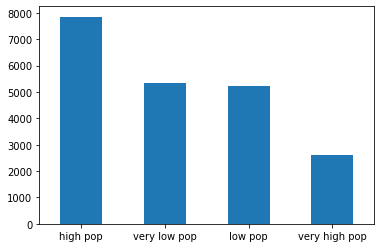

In [34]:
# We effectively transform a numerical feature into a categorical feature, to improve understanding
# We have a similar number of observations in each bin
# Now stick that on a plot
pd.qcut(deaths.Population, 4, labels=['very low pop','low pop','high pop','very high pop']).value_counts().plot(kind='bar', rot=0)


In [35]:
# Now create the Population bin feature
deaths['Pop_Bin'] = pd.qcut(deaths.Population, 4, labels=['very low pop','low pop','high pop','very high pop'])

In [36]:
deaths.tail()

,day,countryCode,countryName,Population,region,lat,lon,confirmed,recovered,death,Territory,cov_year,cov_month,cov_day,Territory X Date,Continent,Pop_Bin
21058,05/15/20,ZW,Zimbabwe,13061239.0,Africa,-20.0,30.0,42,13,4,Zimbabwe,2020,5,15,Zimbabwe X 05/15/20,F,high pop
21059,05/16/20,ZW,Zimbabwe,13061239.0,Africa,-20.0,30.0,42,13,4,Zimbabwe,2020,5,16,Zimbabwe X 05/16/20,F,high pop
21060,05/17/20,ZW,Zimbabwe,13061239.0,Africa,-20.0,30.0,44,17,4,Zimbabwe,2020,5,17,Zimbabwe X 05/17/20,F,high pop
21061,05/18/20,ZW,Zimbabwe,13061239.0,Africa,-20.0,30.0,46,18,4,Zimbabwe,2020,5,18,Zimbabwe X 05/18/20,F,high pop
21062,05/19/20,ZW,Zimbabwe,13061239.0,Africa,-20.0,30.0,46,18,4,Zimbabwe,2020,5,19,Zimbabwe X 05/19/20,F,high pop


In [37]:
pd.crosstab(deaths.Continent, deaths.Pop_Bin)

Pop_Bin,very low pop,low pop,high pop,very high pop
Continent,,,,
C,119,238,119,0
F,1190,1309,3094,595
M,1666,833,1071,476
S,833,1071,2261,952
U,1547,1785,1309,595


In [38]:
# Let's use get_dummies function to Convert categorical variable into dummy/indicator variables
# NB that Continent is a categorical feature A/F/S.. - but get_dummies doesn't mind if you pass such a feature
# if it only has two classes
# We will be overwriting the contents of deaths
deaths = pd.get_dummies(deaths, columns=['Continent','Pop_Bin'])

In [39]:
deaths.tail()

,day,countryCode,countryName,Population,region,lat,lon,confirmed,recovered,death,...,Territory X Date,Continent_C,Continent_F,Continent_M,Continent_S,Continent_U,Pop_Bin_very low pop,Pop_Bin_low pop,Pop_Bin_high pop,Pop_Bin_very high pop
21058,05/15/20,ZW,Zimbabwe,13061239.0,Africa,-20.0,30.0,42,13,4,...,Zimbabwe X 05/15/20,0,1,0,0,0,0,0,1,0
21059,05/16/20,ZW,Zimbabwe,13061239.0,Africa,-20.0,30.0,42,13,4,...,Zimbabwe X 05/16/20,0,1,0,0,0,0,0,1,0
21060,05/17/20,ZW,Zimbabwe,13061239.0,Africa,-20.0,30.0,44,17,4,...,Zimbabwe X 05/17/20,0,1,0,0,0,0,0,1,0
21061,05/18/20,ZW,Zimbabwe,13061239.0,Africa,-20.0,30.0,46,18,4,...,Zimbabwe X 05/18/20,0,1,0,0,0,0,0,1,0
21062,05/19/20,ZW,Zimbabwe,13061239.0,Africa,-20.0,30.0,46,18,4,...,Zimbabwe X 05/19/20,0,1,0,0,0,0,0,1,0


# Drop and Reorder Columns

In [40]:
# axis = 1 i.e. drop columns, inplace of the current df
deaths.drop(['region','Population','countryName'], axis=1, inplace = True)
deaths.drop(['countryCode','Territory','day'], axis=1, inplace = True)
deaths.drop(['lat','lon'], axis=1, inplace = True)

In [41]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21063 entries, 0 to 21062
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   confirmed              21063 non-null  int64 
 1   recovered              21063 non-null  int64 
 2   death                  21063 non-null  int64 
 3   cov_year               21063 non-null  int64 
 4   cov_month              21063 non-null  int64 
 5   cov_day                21063 non-null  int64 
 6   Territory X Date       21063 non-null  object
 7   Continent_C            21063 non-null  uint8 
 8   Continent_F            21063 non-null  uint8 
 9   Continent_M            21063 non-null  uint8 
 10  Continent_S            21063 non-null  uint8 
 11  Continent_U            21063 non-null  uint8 
 12  Pop_Bin_very low pop   21063 non-null  uint8 
 13  Pop_Bin_low pop        21063 non-null  uint8 
 14  Pop_Bin_high pop       21063 non-null  uint8 
 15  Pop_Bin_very high p

In [42]:
cols_to_order = ['Territory X Date','confirmed','recovered','death','cov_year','cov_month','cov_day','Continent_C', 'Continent_F','Continent_M','Continent_S','Continent_U','Pop_Bin_very low pop',
                'Pop_Bin_low pop','Pop_Bin_high pop','Pop_Bin_very high pop']
new_columns = cols_to_order + (deaths.columns.drop(cols_to_order).tolist())
deaths = deaths[new_columns]


In [139]:
deaths.tail()

,Territory X Date,confirmed,recovered,death,cov_year,cov_month,cov_day,Continent_C,Continent_F,Continent_M,Continent_S,Continent_U,Pop_Bin_very low pop,Pop_Bin_low pop,Pop_Bin_high pop,Pop_Bin_very high pop
21058,Zimbabwe X 05/15/20,42,13,4,2020,5,15,0,1,0,0,0,0,0,1,0
21059,Zimbabwe X 05/16/20,42,13,4,2020,5,16,0,1,0,0,0,0,0,1,0
21060,Zimbabwe X 05/17/20,44,17,4,2020,5,17,0,1,0,0,0,0,0,1,0
21061,Zimbabwe X 05/18/20,46,18,4,2020,5,18,0,1,0,0,0,0,0,1,0
21062,Zimbabwe X 05/19/20,46,18,4,2020,5,19,0,1,0,0,0,0,0,1,0


In [44]:
# Saving and viewing
deaths.to_csv('train.csv', index=False)

In [45]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21063 entries, 0 to 21062
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Territory X Date       21063 non-null  object
 1   confirmed              21063 non-null  int64 
 2   recovered              21063 non-null  int64 
 3   death                  21063 non-null  int64 
 4   cov_year               21063 non-null  int64 
 5   cov_month              21063 non-null  int64 
 6   cov_day                21063 non-null  int64 
 7   Continent_C            21063 non-null  uint8 
 8   Continent_F            21063 non-null  uint8 
 9   Continent_M            21063 non-null  uint8 
 10  Continent_S            21063 non-null  uint8 
 11  Continent_U            21063 non-null  uint8 
 12  Pop_Bin_very low pop   21063 non-null  uint8 
 13  Pop_Bin_low pop        21063 non-null  uint8 
 14  Pop_Bin_high pop       21063 non-null  uint8 
 15  Pop_Bin_very high p

# Read 'Train.csv'


In [46]:
deaths = pd.read_csv('train_pape.csv')

In [47]:
X = deaths.loc[:, deaths.columns != 'death'] #all rows and columns, except DEATH
X = deaths.loc[:, deaths.columns != 'Territory X Date'] #all rows and columns, except Territory X date, to delete
y = deaths['death'].ravel() #ravel creates a flat 1-d array


In [48]:
print(X.shape, y.shape)

(21063, 15) (21063,)


In [49]:
# X this means 21063 rows, and 15 colums/features, not including target
# y this means 21063 one dimensional array, one feature

In [51]:
#Now split the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16850, 15) (16850,)
(4213, 15) (4213,)


In [52]:
#We've just split the data into 80/20 
# Now let's see how many positive class values are in the train and test data
# Mean will give us the proportion of positives (i.e. 1 = TARGET)
print('Mean target in the 80% training data: {0:.3f}'.format(np.mean(y_train)))
print('Mean target in the 20% training test data: {0:.3f}'.format(np.mean(y_test)))

Mean target in the 80% training data: 360.986
Mean target in the 20% training test data: 327.208


# check scikit-learn version

In [53]:
import sklearn
sklearn.__version__
# we need at least 0.19 onwards

'0.22.1'

# Create baseline model

In [87]:
# We want to know what our data precision and accuracy looks like BEFORE we start to do machine learning
from sklearn.dummy import DummyClassifier

In [88]:
#create a model
# most_frequent we want the model to output the majority class - i.e. 0/Not Survived in our case
model_dummy = DummyClassifier(strategy='most_frequent', random_state=0)
#
# Train the model using fit() with the input data, and the output data.  
model_dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [98]:
# let's evaluate the performance.
# The model will predict the output against X_test and then it will compare it against the actual y_test
# The classification model will represent the model accuracy
print('Score for baseline mode : {0:.2f}'.format(model_dummy.score(X_test, y_test)))

Score for baseline mode : 0.58


# other performance metrics

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# Method signatures are Actual Output, Predicited Output.  We can use the predict function on the input data to easily get the prediciton

In [99]:
#input data to easily get the prediciton
print('Accuracy for baseline model: {0:.2f}'.format(accuracy_score(y_test, model_dummy.predict(X_test))))

Accuracy for baseline model: 0.58


# Logistic Regression Modelling

In [82]:
# import the function from scikit-learn
from sklearn.linear_model import LogisticRegression

In [83]:
# create the model
model_lr_1 = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)


In [84]:
# train the model
model_lr_1.fit(X_train, y_train)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
# evaluate the model
print('Score for logistic regression v0.1: {0:.2f}'.format(model_lr_1.score(X_test, y_test)))

Score for logistic regression v0.1: 0.58


# Feature Standardisation and Normalisation

In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Feature Normalisation

In [62]:
# this is when we want to get the features we are using into the same scal
scaler = MinMaxScaler()
# create teh scaled object
X_train_scaled = scaler.fit_transform(X_train) #fit_transform combines fits the scaler with X_train, then scale the content

In [63]:
# now we have 'scaled' the output on the defaults for the min/max scaler function
# let's see what happens to the data
X_train_scaled[:,0].min(), X_train_scaled[:,0].max()

(0.0, 1.0)

In [64]:
# This is as expected
# Now we have to scale the test data - as if we are training the model on normalised data,
# we should also test it against normalised data too
# We use different function, without the fit
X_test_scaled = scaler.transform(X_test)

# Feature Standardisation

In [65]:
scaler = StandardScaler()  # will now have 0 mean and 1 standard deviation
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create our model AFTER standardisation

In [66]:
# base model
from sklearn.model_selection import GridSearchCV
model_lr = LogisticRegression(random_state=0)

In [77]:
params = {'C': [1.0,10.0,50.0, 100.0, 1000.0],'max_iter': [100], 'penalty': ['l2']} #L1, L2
# set the output model
crossValLF = GridSearchCV(model_lr, param_grid=params, cv=3) # use K-Fold 3 cross validation split on the data
crossValLF.fit(X_train_scaled, y_train)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'max_iter': [100, 200], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [78]:
# What is the best score now?
crossValLF.best_score_

0.5885461391032277

In [79]:
print('Score for logistic regression model v0.2: {0:.2f}'.format(crossValLF.score(X_test_scaled, y_test))) # run it against the test data

Score for logistic regression model v0.2: 0.59


In [131]:
territory = deaths['Territory X Date']


0         Andorra X 01/22/20
1         Andorra X 01/23/20
2         Andorra X 01/24/20
3         Andorra X 01/25/20
4         Andorra X 01/26/20
                ...         
21058    Zimbabwe X 05/15/20
21059    Zimbabwe X 05/16/20
21060    Zimbabwe X 05/17/20
21061    Zimbabwe X 05/18/20
21062    Zimbabwe X 05/19/20
Name: Territory X Date, Length: 21063, dtype: object

# Submit to Zindi

In [119]:
test_X = X.to_numpy().astype('float')

In [120]:
# we submit our prediction output, and Kaggle compares with actual output.
predictions = model_dummy.predict(test_X)

In [121]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
# The file to submit to Kaggle is in format PassengerId : Survived 
# Build it in a pandas data frame from the index value of the test_df dataframe
df_submission = pd.DataFrame({'Territory X Date': territory,'target': predictions})

In [127]:
df_submission.head()

,Territory X Date,target
0,Andorra X 01/22/20,0
1,Andorra X 01/23/20,0
2,Andorra X 01/24/20,0
3,Andorra X 01/25/20,0
4,Andorra X 01/26/20,0


In [128]:
#save this data frame down to disk
submission_data_path = os.path.join(os.path.pardir, 'data','external')
submission_file_path = os.path.join(submission_data_path, 'test_data.csv')

In [129]:
df_submission.to_csv(submission_file_path, index=False) #index=False so there's no extra index column in the file